In [77]:
# Part 1: using PCA to project 2D data into its principle axes
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [78]:
# reproducabilty of random number using seed
np.random.seed(42)
mean = [0, 0]
# covariance matrix where diagonal 3, 2 is the variance of X1 and X2 i.e. spread wrt mean
# and 2, 2 is the covariance between X1 and X2 i.e. relationship 
cov = [[3, 2], [2, 2]] 
X = np.random.multivariate_normal(mean = mean, cov = cov, size = 200)

<function matplotlib.pyplot.show(close=None, block=None)>

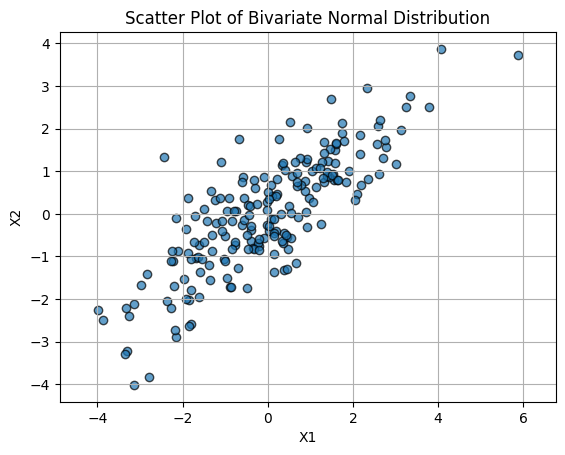

In [79]:
plt.figure
plt.scatter(X[:, 0], X[:, 1], edgecolors='k', alpha=0.7)
plt.title('Scatter Plot of Bivariate Normal Distribution')
plt.xlabel('X1')
plt.ylabel('X2')
plt.axis('equal')
plt.grid(True)
plt.show

In [80]:
# perform PCA on the dataset
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [81]:
components = pca.components_
components # each row is a unit vector showing the direction of a principal component 

array([[ 0.78215821,  0.62307987],
       [-0.62307987,  0.78215821]])

In [82]:
pca.explained_variance_ratio_
# ~91% variance is captured by our first Principle component

array([0.9111946, 0.0888054])

In [83]:
# Project the data onto its principle component axes
# eventhough it says dot, it's actually matrix multiplication since the dimention of the two matrices are not 1D
projection_pc1 = np.dot(X, components[0])
projection_pc2 = np.dot(X, components[1])

In [84]:
x_pc1 = projection_pc1 * components[0][0]
x_pc2 = projection_pc1 * components[0][1]
x_pc3 = projection_pc2 * components[1][0]
x_pc4 = projection_pc2 * components[1][1]

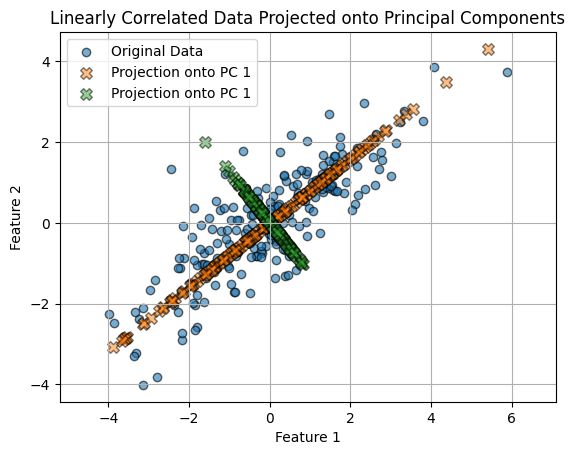

In [85]:
# Plot the results
plt.figure()
plt.scatter(X[:,0], X[:, 1], label='Original Data', ec='k', alpha=0.6)

# Plot projections along PC1 and PC2
plt.scatter(x_pc1, x_pc2, ec='k', marker='X', s=70, alpha=0.5, label = 'Projection onto PC 1')
plt.scatter(x_pc3, x_pc4, ec='k', marker='X', s=70, alpha=0.5, label = 'Projection onto PC 1')
plt.title('Linearly Correlated Data Projected onto Principal Components', )
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

In [86]:
# Part 2: PCA for feature space dimensionality reduction
# load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
# iris flower's name
target_names = iris.target_names
# standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [87]:
pca_iris = PCA(n_components=2)
X_pca = pca_iris.fit_transform(X_scaled)

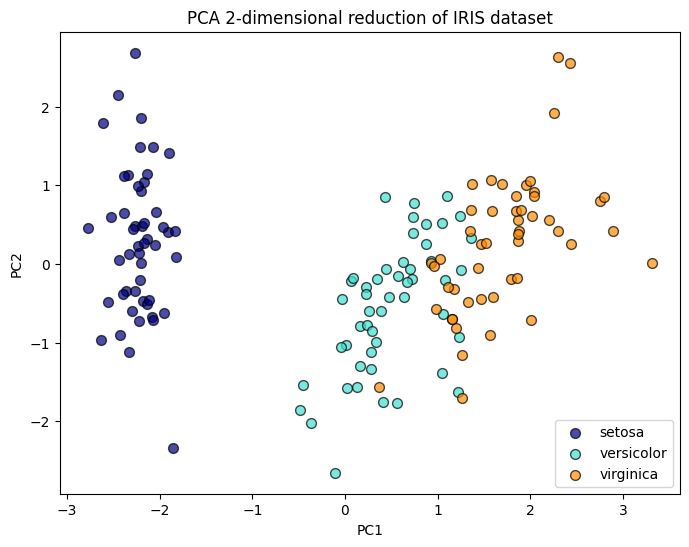

In [88]:
# Plot the PCA-transformed data in 2D
plt.figure(figsize=(8,6))
colors = ['navy', 'turquoise', 'darkorange']
lw=1

for color, i, target_name in zip(colors, [0,1,2], target_names):
  # using boolean mask on y (target) to only select 0,1,2 in each loop
  plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color = color, s=50, ec='k', alpha=0.7, lw=lw, label=target_name)

plt.title('PCA 2-dimensional reduction of IRIS dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.show()

In [89]:
# ~95.8% of the original feature space variance these two combined principle components explain
100 * pca_iris.explained_variance_ratio_.sum()

np.float64(95.81320720000164)

In [90]:
# Standarize the Iris data, and fit and transform the scaled data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA model without reducing dimensionality i.e. default value PCA(n_components=None) 
pca = PCA() 
pca.fit_transform(X_scaled)

array([[-2.26470281e+00,  4.80026597e-01,  1.27706022e-01,
        -2.41682039e-02],
       [-2.08096115e+00, -6.74133557e-01,  2.34608854e-01,
        -1.03006775e-01],
       [-2.36422905e+00, -3.41908024e-01, -4.42014848e-02,
        -2.83770534e-02],
       [-2.29938422e+00, -5.97394508e-01, -9.12901063e-02,
         6.59555596e-02],
       [-2.38984217e+00,  6.46835383e-01, -1.57381957e-02,
         3.59228133e-02],
       [-2.07563095e+00,  1.48917752e+00, -2.69682944e-02,
        -6.60818022e-03],
       [-2.44402884e+00,  4.76441976e-02, -3.35470401e-01,
         3.67755572e-02],
       [-2.23284716e+00,  2.23148073e-01,  8.86954979e-02,
         2.46120962e-02],
       [-2.33464048e+00, -1.11532768e+00, -1.45076864e-01,
         2.68592208e-02],
       [-2.18432817e+00, -4.69013561e-01,  2.53765567e-01,
         3.98992877e-02],
       [-2.16631010e+00,  1.04369065e+00,  2.68681102e-01,
        -1.67313672e-02],
       [-2.32613087e+00,  1.33078335e-01, -9.37592444e-02,
      

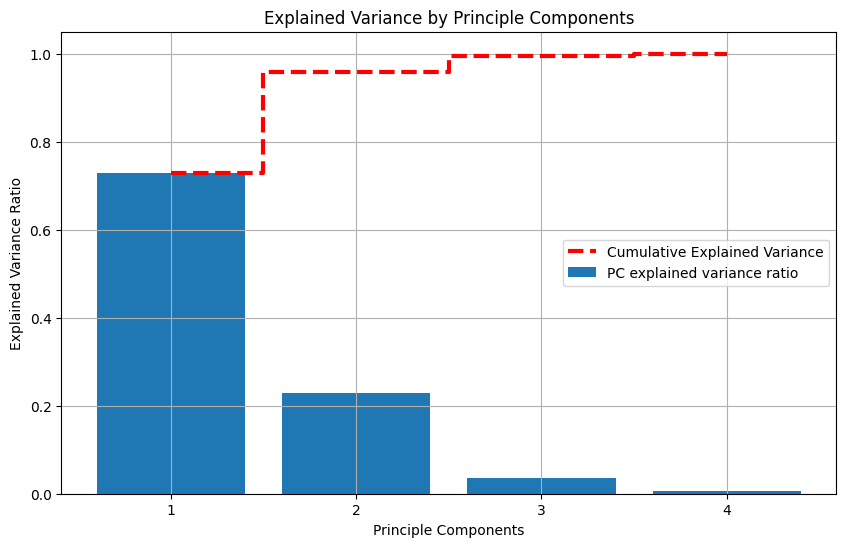

In [91]:
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot explained variance ratio for each component
plt.figure(figsize=(10,6))
plt.bar(x=range(1, len(explained_variance_ratio)+1), height=explained_variance_ratio, alpha=1, align='center', label='PC explained variance ratio')
plt.xlabel('Principle Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principle Components')

# Plot cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio) # cumsum is cumulative sum
plt.step(range(1, 5), cumulative_variance, where='mid', linestyle='--', lw=3, color='red', label='Cumulative Explained Variance')
# Only display integer ticks on the x-axis
plt.xticks(range(1,5))
plt.legend()
plt.grid(True)
plt.show()